In [15]:
import pandas as pd
import numpy as np
merged=pd.read_csv("/Users/lennertbontinck/Documents/github/bachelorproef-compressie/resultaten/csv/merged.csv")
merged=merged.loc[merged['extension'] == "webp"]
merged=merged.loc[merged.filename.isin([14,15])]

In [16]:
mean_sharpness = merged.groupby(['filename', 'extension'], sort=False)['sharpness'].mean().to_frame()
mean_sharpness = mean_sharpness.rename(columns = {'sharpness':'mean_sharpness'})

median_sharpness = merged.groupby(['filename', 'extension'], sort=False)['sharpness'].median().to_frame()
median_sharpness = median_sharpness.rename(columns = {'sharpness':'median_sharpness'})

mean_color_contrast =  merged.groupby(['filename', 'extension'], sort=False)['color_contrast'].mean().to_frame()
mean_color_contrast = mean_color_contrast.rename(columns = {'color_contrast':'mean_color_contrast'})

median_color_contrast =  merged.groupby(['filename', 'extension'], sort=False)['color_contrast'].median().to_frame()
median_color_contrast = median_color_contrast.rename(columns = {'color_contrast':'median_color_contrast'})

mean_general =  merged.groupby(['filename', 'extension'], sort=False)['general'].mean().to_frame()
mean_general = mean_general.rename(columns = {'general':'mean_general'})

median_general =  merged.groupby(['filename', 'extension'], sort=False)['general'].median().to_frame()
median_general = median_general.rename(columns = {'general':'median_general'})

In [17]:
merged_mean_median=mean_sharpness.merge(median_sharpness,on=['filename', 'extension'])
merged_mean_median=merged_mean_median.merge(mean_color_contrast,on=['filename', 'extension'])
merged_mean_median=merged_mean_median.merge(median_color_contrast,on=['filename', 'extension'])
merged_mean_median=merged_mean_median.merge(mean_general,on=['filename', 'extension'])
merged_mean_median=merged_mean_median.merge(median_general,on=['filename', 'extension'])
merged_mean_median = merged_mean_median.sort_values(by=['filename', 'extension'])
merged_mean_median = merged_mean_median.reset_index()
merged_mean_median.index = np.arange(14, len(merged_mean_median) + 14)
merged_mean_median

,filename,extension,mean_sharpness,median_sharpness,mean_color_contrast,median_color_contrast,mean_general,median_general
14,14,webp,4.604651,5,4.604651,5,4.767442,5
15,15,webp,4.534884,5,4.697674,5,4.790698,5


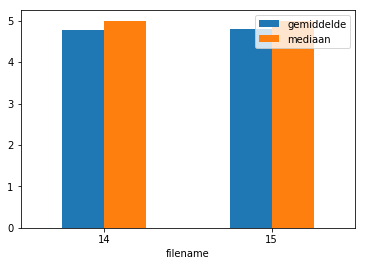

In [18]:
means = merged_mean_median["mean_general"]
medians = merged_mean_median["median_general"]
index = merged_mean_median["filename"]
df = pd.DataFrame({'gemiddelde': means, 'mediaan': medians}, index=index)
ax = df.plot.bar(rot=0)